In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
ri = pd.read_csv('police.csv',sep = ',')

print(ri.shape)
ri.head(10)

(91741, 15)


,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [5]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [6]:
#remove columns that only contain missing values
ri.drop('county_name',axis = 'columns', inplace = True)

#ri.dropna(axis = 'columns' , how = 'all')
#del ri['column name]

### Do men or women speed more often ?

In [7]:

ri[ri.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [26]:
# Do men or women speed more often  - in percentage

ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize = True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [28]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize = True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [29]:
ri[ri.driver_gender == 'F'].violation.value_counts(normalize = True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [32]:
#To put one line of code
ri.groupby('driver_gender').violation.value_counts(normalize = True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [35]:
#unstack gives you dataframe
ri.groupby('driver_gender').violation.value_counts(normalize = True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


In [33]:
ri.groupby('driver_gender').violation.value_counts(normalize = True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

### Does Gender affect who gets searched during a stop?

In [39]:
 
ri.search_conducted.value_counts(normalize = True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [40]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [43]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

### handling missing values

In [8]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [44]:
#search type is missing anytime serach conducted is False
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [45]:

ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonab

In [47]:
#why it is an empty series - > search_type is always NULL 
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [9]:
ri[ri.search_conducted == False].search_type.value_counts(dropna = False)

NaN    88545
Name: search_type, dtype: int64

### During a search, how often is a driver frisked ?

In [15]:
#string method
ri.frisk = ri.search_type.str.contains('Protective Frisk')

In [16]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: search_type, dtype: int64

In [17]:
ri.frisk.sum()

274

### Which year had the least number of stops ?

In [19]:
ri.stop_date.str.slice(0,4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [21]:
combined = ri.stop_date.str.cat(ri.stop_time , sep = ' ')
combined.head()

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [23]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [26]:
ri.stop_datetime.dt.year.head()

0    2005
1    2005
2    2005
3    2005
4    2005
Name: stop_datetime, dtype: int64

### How does drug activity change by time of day ?

In [27]:
ri.drugs_related_stop.mean()

0.008883705213590434

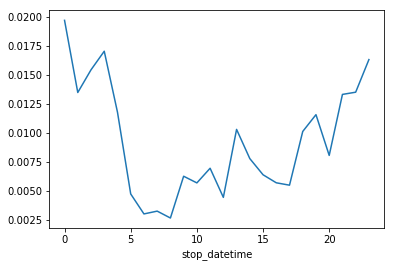

In [32]:
#for each hour what is the rate of druge related activity 

#default plot for panda series is line plot
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

### Do most stops occur at night ?

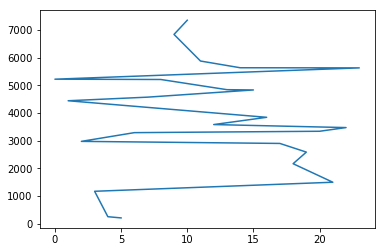

In [35]:
ri.stop_datetime.dt.hour.value_counts().plot()

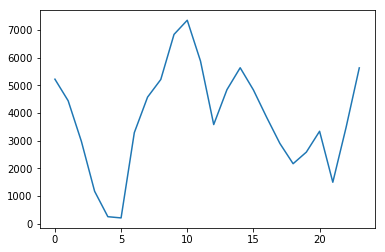

In [37]:
#After the fix 
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

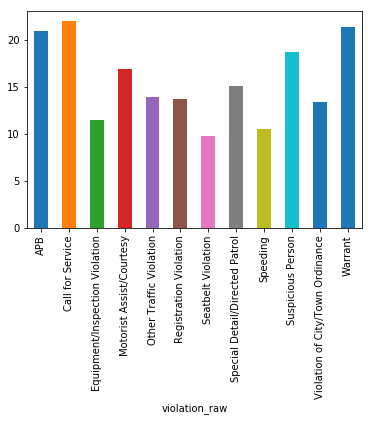

In [65]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

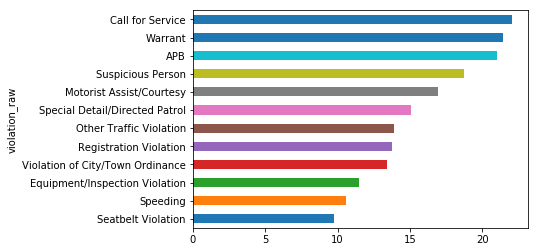

In [66]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

In [41]:
#filter by night
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape

(68575, 15)

### Find the bad data in the stop_duration column and fix it

In [49]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [56]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'


In [57]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [58]:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2') , 'stop_duration'] = 'NaN'


In [59]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [61]:
import numpy as np


ri.loc[ri.stop_duration == 'NaN' , 'stop_duration'] = np.nan

In [63]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64